# People Matching Algortihm

## Steps to be done

1. Get the data
2. Tranform into usable format (pandas?)
3. Clean the data (extract what data is needed)
4.  

## Step 1: Mentor Data

In [96]:
import pandas as pd
import random
import xlsxwriter
import warnings
warnings.simplefilter("ignore")

In [97]:
# reed in mentor data
df_mentor_raw = pd.read_excel(r"FY21 - Chairman Mentor Interest Form.xlsx",sheet_name="Form1")

# check out data
df_mentor_raw.shape  #(91, 41)

(91, 41)

In [98]:
def drop_nan_cols(df):
    nr = df.shape[0]
    for column in df.columns:
        if df[column].isnull().sum(axis = 0) == nr:
            df.drop([column], axis=1, inplace=True)
    return df

df_mentor_raw = drop_nan_cols(df_mentor_raw)
df_mentor_raw.shape  #(91, 29) removed 12 cols full of NaNs

(91, 29)

In [99]:
#remove start & completion time cols
df_mentor_raw.drop(["Start time", 
         "Completion time",
         "Are you a CSAP Alum?2",
         "What is your CSAP Class FY?",
         "Which track were you in?",
         "Have you mentored an Early in Career before?",
         "Any final comments or suggestions before you submit?"], 
        axis=1, inplace=True) #remove start & completion time cols
df_mentor_raw.drop([0,1], axis=0, inplace=True)

df_mentor_raw = pd.DataFrame(df_mentor_raw).set_index('Name', drop=True)

In [100]:
df_mentor_raw.head()

,ID,Email,How many Y2 CSAP Associates are you willing to mentor?,What are you most likely to give in this mentoring engagement?,What would you like to get out of this mentoring engagement?,What is your title?,Your city of residence,Your theatre?,Would you prefer a mentee in the same theatre?,Would you prefer a mentee in a:,...,Your segment?,What was most challenging about the engagement and how did you overcome it?,Your country of residence,What are you general strengths?,What are your personal interests?,What do you think qualifies you to be a good mentor?2,What are your early expectations from this mentoring engagement?,Your linkedIn profile link,Have you already mentored for the Chairman Club Mentoring Program?,Let us know if you already have a CSAP mentee in mind
Name,,,,,,,,,,,,,,,,,,,,,
Luc Janssen,3,lujansse@cisco.com,1,General strategic career advice depending on m...,Reverse Mentoring (i.e getting a millennial pe...,Partner Account Manager,Amsterdam,EMEAR,Yes,No preference,...,Partner,NaN,Netherlands,Change management;Personal Brand;Critical thin...,Cycling;Cooking;Family;,"Expertise, open minded (learning is a two way ...",Providing guidance for career development (bra...,https://www.linkedin.com/in/lwjmajanssen/,No,NaN
Mary Catherine Dolehide,4,mdolehid@cisco.com,1,I'm flexible and will adapt to my mentee's goals;,To develop myself as a people manager while de...,Renewals Manager,"Hinsdale, Illinois",AMER,No preference,Sales role,...,Service Provider,NaN,US,Collaboration;Customer interaction;Accountabil...,"Family;Individual sports (golf, running);Travel;",Over my 30 years in technology sales for both ...,To share my 30 years of sales experience and r...,Mary Catherine Dolehide,No,NaN
Leonora Steger,5,lronga@cisco.com,2,I'm flexible and will adapt to my mentee's goals;,To develop myself as a people manager while de...,Cisco Select Account Manager,East Northport,AMER,No preference,Sales role,...,Commercial,NaN,USA,Customer interaction;Effective listening;Coach...,Cooking;Family;Reading;,I think a good mentor should be open to commun...,I have mentored before but not through a specf...,https://www.linkedin.com/in/leonorasteger/,No,NaN
Steve Fuchs,6,stefuchs@cisco.com,2,General strategic career advice depending on m...,Reverse Mentoring (i.e getting a millennial pe...,Technical Solutions Architect,"Phoenix, AZ",AMER,Yes,No preference,...,Commercial,Focus differences between myself and mentee. ...,United States,Accountability;Coaching;Critical thinking;,Photography;Pets;,"Listening, guidance, availability to discuss a...",not alot. many people don't spend the time.,www.linkedin/in/fuchssteven,Yes,NaN
Chase Abrams,7,chabrams@cisco.com,1,I'm flexible and will adapt to my mentee's goals;,To develop myself as a people manager while de...,Senior Account Manager,Denver,AMER,No preference,Sales role,...,Service Provider,NaN,USA,Accountability;Customer interaction;Goal setting;,"Individual sports (golf, running);Tech hobbies...",I think I'd qualify as a good mentor for many ...,I'm 36 years old and have been in technology s...,https://www.linkedin.com/in/chase-abrams/,No,NaN


Up to this point, the dataset is clean from data we do not need for matching. 

In [101]:
#df["colname"].isnull().values.any().sum()

df_mentor_raw.isnull().sum(axis = 0)

ID                                                                              0
Email                                                                           0
How many Y2 CSAP Associates are you willing to mentor?                          0
What are you most likely to give in this mentoring engagement?                  0
What would you like to get out of this mentoring engagement?                    0
What is your title?                                                             0
Your city of residence                                                          0
Your theatre?                                                                   0
Would you prefer a mentee in the same theatre?                                  0
Would you prefer a mentee in a:                                                 0
Would you prefer a mentee of the same gender?                                   0
Your segment?                                                                   0
What was most ch

In [102]:
df_mentor = df_mentor_raw[["What are you most likely to give in this mentoring engagement?",
               "What are you general strengths?",
               "What are your personal interests?"]]
#df_mentor = pd.DataFrame(df_mentor).set_index('Name', drop=True)
df_mentor.head()

,What are you most likely to give in this mentoring engagement?,What are you general strengths?,What are your personal interests?
Name,,,
Luc Janssen,General strategic career advice depending on m...,Change management;Personal Brand;Critical thin...,Cycling;Cooking;Family;
Mary Catherine Dolehide,I'm flexible and will adapt to my mentee's goals;,Collaboration;Customer interaction;Accountabil...,"Family;Individual sports (golf, running);Travel;"
Leonora Steger,I'm flexible and will adapt to my mentee's goals;,Customer interaction;Effective listening;Coach...,Cooking;Family;Reading;
Steve Fuchs,General strategic career advice depending on m...,Accountability;Coaching;Critical thinking;,Photography;Pets;
Chase Abrams,I'm flexible and will adapt to my mentee's goals;,Accountability;Customer interaction;Goal setting;,"Individual sports (golf, running);Tech hobbies..."


In [103]:
def extract_choices(df_col):
    choices = []
    cols = set()
    data = set(df_col)
    #data = data.split(";")
    #print(data)
    for choice in data:
        choice = choice.split(";")
        choices.append(choice)
    for innerlist in choices:
        for choice in innerlist:
            if choice != "":
                cols.add(choice)    
        
    return list(cols)

give_mentor = extract_choices(df_mentor["What are you most likely to give in this mentoring engagement?"])
strengths_mentor = extract_choices(df_mentor["What are you general strengths?"])
interests_mentor = extract_choices(df_mentor["What are your personal interests?"])

In [104]:
# make one hot df

def encode_onehot(df_input, df_output):
    count = 0
    for answer in df_output.columns:
        if answer == "ID":
            continue
        for column in df_input.columns:
            if column == "ID":
                continue
            for result in df_input[column]:
                if answer in result: 
                    df_output.loc[df_output.index[count], answer] = 1           #.iloc[:,2:3]               
                                       
                if count == (len(df_input.index)-1):
                    count = 0
                else:
                    count += 1
    df_output = df_output.fillna(0)
    return df_output

### Mentor Question 1: What are you most likely to give in this mentoring engagement?

This section creates a onehot encoded dataframe of the answers given by the mentors to this question.

The responses were classifies into 4 main types: 
* **General Advice**
* **Specific Advice**
* **Day to Day Advice**
* **Own Advice**

The following responses were edited, due to their multiple meanings:
* **All or any of the above** --> matches all the 4 response types
* **I'm flexible and will adapt to my mentee's goals** --> matches all the 4 response types

The following responses (recorded in the "others" field) were merged as following:
* **Contact Center knowledge transfer** -->  matches *Specific Advice*
* **how to become a trusted advisor and support customer with strategic planning** --> matches *Own Advice*
* **Sharing my own career journey and lessons learnt** --> matches *Own Advice*
* **An out of the box angle back on a situation.** --> matches *Own Advice*

In [105]:
df_give_mentor = encode_onehot(df_mentor, pd.DataFrame([], index=df_mentor.index, columns=give_mentor))

In [106]:
df_give_mentor.head()

,General strategic career advice depending on mentee goals,Contact Center knowledge transfer,how to become a trusted advisor and support customer with strategic planning,an out of the box angle back on a situation.,all or any of the above,Tactical day to day situations & problem solving,I'm flexible and will adapt to my mentee's goals,Specific career advice to prepare for next role,Sharing my own career journey and lessons learnt
Name,,,,,,,,,
Luc Janssen,1,0,0,0,0,1,0,1,1
Mary Catherine Dolehide,0,0,0,0,0,0,1,0,0
Leonora Steger,0,0,0,0,0,0,1,0,0
Steve Fuchs,1,0,0,0,0,1,1,1,1
Chase Abrams,0,0,0,0,0,0,1,0,0


In [107]:
# function to combine multiple onehot encoded columns into one and optionally adding to new df
def combine_cols(df, combine_cols, add_to_df="no", combine_name=None):
    for col in combine_cols:
        if col == combine_cols[0]:
            result_list = list(df[col])
        else:
            result_list = [x + y for x, y in zip(result_list, list(df[col]))]
            
    result_list = [1 if x>1 else x for x in result_list]
            
    if type(add_to_df) == pd.core.frame.DataFrame:
        add_to_df[combine_name] = result_list
        add_to_df.set_index(df.index.values, inplace=True)
        return add_to_df
    else:
        return result_list

In [108]:
df_give_mentor_final = pd.DataFrame()

# combining the columns
cols = ["General strategic career advice depending on mentee goals", 
        "all or any of the above", 
        "I'm flexible and will adapt to my mentee's goals"]
df_give_mentor_final = combine_cols(df_give_mentor, cols, add_to_df=df_give_mentor_final, combine_name="general_advice")

# Specific advice
cols = ["Contact Center knowledge transfer", # own answer
        "all or any of the above", 
        "I'm flexible and will adapt to my mentee's goals",
        "Specific career advice to prepare for next role"]
df_give_mentor_final = combine_cols(df_give_mentor, cols, add_to_df=df_give_mentor_final, combine_name="specific_advice")

# Advice of day to day situations & problem solving
cols = ["Tactical day to day situations & problem solving", 
        "all or any of the above", 
        "I'm flexible and will adapt to my mentee's goals"]
df_give_mentor_final = combine_cols(df_give_mentor, cols, add_to_df=df_give_mentor_final, combine_name="day2day_advice")

# Own experience
cols = ["how to become a trusted advisor and support customer with strategic planning ", # own answer
        "Sharing my own career journey and lessons learnt", 
        "an out of the box angle back on a situation. ", # own answer
        "all or any of the above", 
        "I'm flexible and will adapt to my mentee's goals"]
df_give_mentor_final = combine_cols(df_give_mentor, cols, add_to_df=df_give_mentor_final, combine_name="own_advice")


This is the final one hot encoded dataframe of the answers to Mentor Question 1:

In [109]:
df_give_mentor_final.head()

,general_advice,specific_advice,day2day_advice,own_advice
Luc Janssen,1,1,1,1
Mary Catherine Dolehide,1,1,1,1
Leonora Steger,1,1,1,1
Steve Fuchs,1,1,1,1
Chase Abrams,1,1,1,1


### Mentor Question 2: What are you general strengths?

This section creates a onehot encoded dataframe of the answers given by the mentors to this question.

The following responses (recorded in the "others" field) were merged as following:
* **Social Media** -->  matches *Creativity/Innovation*
* **Rapport Building** --> matches *Customer Interaction* and *Crucial Conversations*
* **Team building** --> matches *Empowerment* and *Recognition*
* **Collaboration** --> matches *Productivity*
* **Accountability** --> matches *Recognition*

In [110]:
df_strengths_mentor = encode_onehot(df_mentor, pd.DataFrame([], index=df_mentor.index, columns=strengths_mentor))

In [111]:
df_strengths_mentor.head()

,Story telling,Effective listening,Creativity / innovation,Competitive strategy,Accountability,Time management,Recognition,Design thinking,Personal Brand,Finance,...,Negotiating,Goal setting,Customer interaction,Prioritization,Work / Life balance,Communications (public speaking),Crucial conversations,Social Media,Collaboration,Technical knowledge
Name,,,,,,,,,,,,,,,,,,,,,
Luc Janssen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Mary Catherine Dolehide,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
Leonora Steger,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Steve Fuchs,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chase Abrams,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [112]:
df_strengths_mentor_final = pd.DataFrame()
exclude = []

# Customer interaction & Rapport Building
cols = ["Customer interaction", 
        "Rapport Building"] # own answer
df_strengths_mentor_final = combine_cols(df_strengths_mentor, cols, add_to_df=df_strengths_mentor_final, combine_name="Customer interaction")
exclude.append(cols)

# Enpowerment & Team Building
cols = ["Empowerment", 
        "Team building"] # own answer
df_strengths_mentor_final = combine_cols(df_strengths_mentor, cols, add_to_df=df_strengths_mentor_final, combine_name="Empowerment")
exclude.append(cols)

# Crucial Conversations & Rapport Building
cols = ["Crucial conversations", 
        "Rapport Building"] # own answer
df_strengths_mentor_final = combine_cols(df_strengths_mentor, cols, add_to_df=df_strengths_mentor_final, combine_name="Crucial conversations")
exclude.append(cols)

# Productivity & Collaboration
cols = ["Productivity", 
        "Collaboration"] # own answer
df_strengths_mentor_final = combine_cols(df_strengths_mentor, cols, add_to_df=df_strengths_mentor_final, combine_name="Productivity")
exclude.append(cols)

# Creativity/Innovation & Social Media
cols = ["Creativity / innovation", 
        "Social Media"] # own answer
df_strengths_mentor_final = combine_cols(df_strengths_mentor, cols, add_to_df=df_strengths_mentor_final, combine_name="Creativity / innovation")
exclude.append(cols)

# Recognition & Team Building & Accountability
cols = ["Recognition", 
        "Team building", # own answer
        "Accountability"] # own answer
df_strengths_mentor_final = combine_cols(df_strengths_mentor, cols, add_to_df=df_strengths_mentor_final, combine_name="Recognition")
exclude.append(cols)

exclude = [item for sublist in exclude for item in sublist]

In [113]:
df_strengths_mentor_final.head()

,Customer interaction,Empowerment,Crucial conversations,Productivity,Creativity / innovation,Recognition
Luc Janssen,0,0,0,0,0,0
Mary Catherine Dolehide,1,0,0,1,0,1
Leonora Steger,1,0,0,0,0,0
Steve Fuchs,0,0,0,0,0,1
Chase Abrams,1,0,0,0,0,1


In [114]:
for column in df_strengths_mentor.columns: 
    if column not in exclude:
        df_strengths_mentor_final[column] = list(df_strengths_mentor[column])

In [115]:
df_strengths_mentor_final.head()

,Customer interaction,Empowerment,Crucial conversations,Productivity,Creativity / innovation,Recognition,Story telling,Effective listening,Competitive strategy,Time management,...,Coaching,Critical thinking,Influencing,Decision making,Negotiating,Goal setting,Prioritization,Work / Life balance,Communications (public speaking),Technical knowledge
Luc Janssen,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Mary Catherine Dolehide,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leonora Steger,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Steve Fuchs,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Chase Abrams,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Mentor Question 3: What are your personal interests?

This section creates a onehot encoded dataframe of the answers given by the mentors to this question.

The following responses (recorded in the "others" field) were merged as following:
* **My work. I know this sounds pleasing but it is the truth** -->  no match
* **Ranching** --> matches *Pets*
* **Car racing** --> matches *Extreme sports (sky diving)*
* **Creating technology video** --> matches *Tech hobbies* and *Photography*
* **Cycling** --> matches *Individual sports (golf, running)*
* **Automobile and Motorcycles collecting and building** --> matches *Puzzles & games*
* **yoga** --> matches *Individual sports (golf, running)*
* **Golf** --> matches *Individual sports (golf, running)*
* **Boating** --> matches *Individual sports (golf, running)*
* **Flying** --> matches *Travel*
* **Skiing and Scuba Diving** --> matches *Extreme sports (sky diving)* and *Individual sports (golf, running)*
* **karate** --> matches *Individual sports (golf, running)*
* **Diving** --> matches *Extreme sports (sky diving)*

In [116]:
df_interests_mentor = encode_onehot(df_mentor, pd.DataFrame([], index=df_mentor.index, columns=interests_mentor))

In [117]:
df_interests_mentor_final = pd.DataFrame()

# Pets & Ranching
cols = ["Pets", 
        "Ranching"] # own answer
df_interests_mentor_final = combine_cols(df_interests_mentor, cols, add_to_df=df_interests_mentor_final, combine_name="Pets")
exclude.append(cols)

# Extreme sports (sky diving) & Car racing & Skiing and Scuba Diving & Diving
cols = ["Extreme sports (sky diving)",
        "Car racing",
        "Skiing and Scuba Diving",# own answer
        "Diving"] # own answer
df_interests_mentor_final = combine_cols(df_interests_mentor, cols, add_to_df=df_interests_mentor_final, combine_name="Extreme sports (sky diving)")
exclude.append(cols)

# Tech Hobbies & Creating technology video
cols = ["Tech hobbies",
        "Creating technology video"] # own answer
df_interests_mentor_final = combine_cols(df_interests_mentor, cols, add_to_df=df_interests_mentor_final, combine_name="Tech Hobbies")
exclude.append(cols)

# Photography & Creating technology video &
cols = ["Photography",
        "Creating technology video"] # own answer
df_interests_mentor_final = combine_cols(df_interests_mentor, cols, add_to_df=df_interests_mentor_final, combine_name="Photography")
exclude.append(cols)

# Individual sports (golf, running) & Creating technology video &
cols = ["Individual sports (golf, running)",
        "Cycling", # own answer
        "yoga", # own answer
        "Golf", # own answer
        "Boating", # own answer
        "Skiing and Scuba Diving", # own answer
        "karate"] # own answer
df_interests_mentor_final = combine_cols(df_interests_mentor, cols, add_to_df=df_interests_mentor_final, combine_name="Individual sports (golf, running)")
exclude.append(cols)

# Puzzles & games & Automobile and Motorcycles collecting and building
cols = ["Puzzles & games",
        "Automobile and Motorcycles collecting and building"] # own answer
df_interests_mentor_final = combine_cols(df_interests_mentor, cols, add_to_df=df_interests_mentor_final, combine_name="Puzzles & games")
exclude.append(cols)

# Travel & Flying
cols = ["Travel",
        "Flying"] # own answer
df_interests_mentor_final = combine_cols(df_interests_mentor, cols, add_to_df=df_interests_mentor_final, combine_name="Travel")
exclude.append(cols)

exclude = [item for sublist in exclude for item in sublist]

In [118]:
for column in df_interests_mentor.columns: 
    if column == "ID" or column == "My work. I know this sounds pleasing but it is the truth":
        continue
    if column not in exclude:
        df_interests_mentor_final[column] = list(df_interests_mentor[column])

In [119]:
df_interests_mentor_final.head()

,Pets,Extreme sports (sky diving),Tech Hobbies,Photography,"Individual sports (golf, running)",Puzzles & games,Travel,Family,Design,Music,...,Gardening,Politics,Volunteering,"Team sports (soccer, football)",Cooking,Social networking,Wine tasting,Culture,Dance,Chess
Luc Janssen,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Mary Catherine Dolehide,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Leonora Steger,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Steve Fuchs,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chase Abrams,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Combine all three dataframes into one:

In [120]:
df_onehot_mentor = pd.concat([df_give_mentor_final, df_strengths_mentor_final,df_interests_mentor_final], axis=1)
df_onehot_mentor = df_onehot_mentor.reindex(sorted(df_onehot_mentor.columns), axis=1)

In [121]:
df_onehot_mentor.head()

,Art,Change management,Chess,Coaching,Communications (public speaking),Competitive strategy,Cooking,Creativity / innovation,Critical thinking,Cross-architecture,...,Transition career path,Travel,Volunteering,Wine tasting,Work / Life balance,Working out,day2day_advice,general_advice,own_advice,specific_advice
Luc Janssen,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,1,1,1
Mary Catherine Dolehide,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,1
Leonora Steger,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Steve Fuchs,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
Chase Abrams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


## Step 2 Mentee data

Now we repeat the process with the Mentee data.

In [122]:
# reed in mentee data
df_mentee_raw = pd.read_excel(r'FY21 - Mentee Interest - Chairman Club & Hall of Fame Mentoring Program.xlsx',sheet_name='Form1')
df_mentee_raw = pd.DataFrame(df_mentee_raw).set_index('Name', drop=True)
df_mentee_raw.shape

(35, 23)

In [123]:
df_mentee_raw = drop_nan_cols(df_mentee_raw)
df_mentee_raw.shape

# no columns had all NaNs

(35, 23)

In [124]:
df_mentee = df_mentee_raw[["What are you most likely to want out of this mentoring engagement?",
               "What are the strengths you'd like to further develop?",
               "What are your personal interests?"]]

In [125]:
want_mentee = extract_choices(df_mentee["What are you most likely to want out of this mentoring engagement?"])
strengths_mentee = extract_choices(df_mentee["What are the strengths you'd like to further develop?"])
interests_mentee = extract_choices(df_mentee["What are your personal interests?"])

### Mentee Question 1: What are you most likely to want out of this mentoring engagement?

This section creates a onehot encoded dataframe of the answers given by the mentees to this question.

The responses were classifies into 4 main types: 
* **General Advice**
* **Specific Advice**
* **Day to Day Advice**
* **Own Advice**

The following responses (recorded in the "others" field) were edited in order to not skew the people matching. If a mentee chooses this, he/she will always be more different than each of the mentors, since no mentor will meet this creteria. 
* **Form a strategic plan on how to become the best (or the mindset that will help me do)**
* **situational experiences (wins and losses) Want to hear their perspective on how to be a good team player Want to hear their thoughts on market changes and where tech, energy and agriculture are headed.**

All responses were add to the **Own Advice** type, since otherwise the data would aswell be skewed. Now it has no impact on the mentee side of data.

In [126]:
df_want_mentee = encode_onehot(df_mentee, pd.DataFrame([], index=df_mentee.index, columns=want_mentee))

In [127]:
df_want_mentee.head()

,"Looking to hear about how they handle pressure, situational experiences (wins and losses) Want to hear their perspective on how to be a good team player Want to hear their thoughts on market changes and where tech, energy and agriculture are headed.",General strategic career advice,Form a strategic plan on how to become the best (or the mindset that will help me do),Tactical day to day situations & problem solving,Specific career advice to prepare for next role
Name,,,,,
Ana Tojeiro,0,1,0,0,0
Yosephine Gita Asaria Hutauruk,0,1,0,1,0
Nikolaos Papadopoulos,0,1,0,0,0
Lucia Caiata,0,1,0,0,0
Radhika Paliwal,0,1,0,1,1


In [128]:
df_want_mentee_final = pd.DataFrame()
exclude = []

# combining the columns
cols = ["Form a strategic plan on how to become the best (or the mindset that will help me do)", 
        "General strategic career advice", 
        "Looking to hear about how they handle pressure, situational experiences (wins and losses) Want to hear their perspective on how to be a good team player Want to hear their thoughts on market changes and where tech, energy and agriculture are headed. "]
df_want_mentee_final = combine_cols(df_want_mentee, cols, add_to_df=df_want_mentee_final, combine_name="general_advice")
exclude.append(cols)

# Specific advice
cols = ["Form a strategic plan on how to become the best (or the mindset that will help me do)", # own answer
        "Specific career advice to prepare for next role", 
        "Looking to hear about how they handle pressure, situational experiences (wins and losses) Want to hear their perspective on how to be a good team player Want to hear their thoughts on market changes and where tech, energy and agriculture are headed. "]
df_want_mentee_final = combine_cols(df_want_mentee, cols, add_to_df=df_want_mentee_final, combine_name="specific_advice")
exclude.append(cols)

# Advice of day to day situations & problem solving
cols = ["Form a strategic plan on how to become the best (or the mindset that will help me do)", # own answer
        "Tactical day to day situations & problem solving", 
        "Looking to hear about how they handle pressure, situational experiences (wins and losses) Want to hear their perspective on how to be a good team player Want to hear their thoughts on market changes and where tech, energy and agriculture are headed. "]
df_want_mentee_final = combine_cols(df_want_mentee, cols, add_to_df=df_want_mentee_final, combine_name="day2day_advice")
exclude.append(cols)

# Own experience
cols = ["Form a strategic plan on how to become the best (or the mindset that will help me do)", 
        "General strategic career advice", 
        "Specific career advice to prepare for next role",
        "Tactical day to day situations & problem solving", 
        "Looking to hear about how they handle pressure, situational experiences (wins and losses) Want to hear their perspective on how to be a good team player Want to hear their thoughts on market changes and where tech, energy and agriculture are headed. "]
df_want_mentee_final = combine_cols(df_want_mentee, cols, add_to_df=df_want_mentee_final, combine_name="own_advice")
exclude.append(cols)

exclude = [item for sublist in exclude for item in sublist]

In [129]:
for column in df_want_mentee.columns: 
    if column not in df_want_mentee_final.columns and column not in exclude:
        df_want_mentee_final[column] = list(df_want_mentee[column])

In [130]:
df_want_mentee_final.head()

,general_advice,specific_advice,day2day_advice,own_advice
Ana Tojeiro,1,0,0,1
Yosephine Gita Asaria Hutauruk,1,0,1,1
Nikolaos Papadopoulos,1,0,0,1
Lucia Caiata,1,0,0,1
Radhika Paliwal,1,1,1,1


### Mentee Question 2: What are the strengths you'd like to further develop?

This section creates a onehot encoded dataframe of the answers given by the mentees to this question.

In [131]:
# with ID column
df_strengths_mentee_final = encode_onehot(df_mentee, pd.DataFrame([], index=df_mentee.index, columns=strengths_mentee))

#df_strengths_mentee_final = encode_onehot(df_mentee, strengths_mentee)


In [132]:
df_strengths_mentee_final.head()

,Story telling,Effective listening,Creativity / innovation,Competitive strategy,Time management,Recognition,Design thinking,Personal Brand,Finance,Change management,...,Negotiating,Productivity,Goal setting,Decision making,Customer interaction,Work / Life balance,Prioritization,Communications (public speaking),Crucial conversations,Technical knowledge
Name,,,,,,,,,,,,,,,,,,,,,
Ana Tojeiro,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
Yosephine Gita Asaria Hutauruk,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
Nikolaos Papadopoulos,1,1,1,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
Lucia Caiata,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
Radhika Paliwal,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


### Mentee Question 3: What are your personal interests?

This section creates a onehot encoded dataframe of the answers given by the mentees to this question.

The following responses (recorded in the "others" field) were merged as following:
* **Pen and Paper role-playing games (e.g. Dungeons & Dragons)** -->  matches *Puzzles & Games*
* **Programming (just beginning to learn!)** --> matches *Tech hobbies*
* **Coffee** --> matches *Cooking*

In [133]:
df_interests_mentee = encode_onehot(df_mentee, pd.DataFrame([], index=df_mentee.index, columns=interests_mentee))

In [134]:
df_interests_mentee_final = pd.DataFrame()
exclude = []

# Pets & Ranching
cols = ["Puzzles & games", 
        "Pen and Paper role-playing games (e.g. Dungeons & Dragons)"] # own answer
df_interests_mentee_final = combine_cols(df_interests_mentee, cols, add_to_df=df_interests_mentee_final, combine_name="Puzzles & games")
exclude.append(cols)

# Extreme sports (sky diving) & Car racing & Skiing and Scuba Diving & Diving
cols = ["Cooking",
        "Coffee"] # own answer
df_interests_mentee_final = combine_cols(df_interests_mentee, cols, add_to_df=df_interests_mentee_final, combine_name="Cooking")
exclude.append(cols)

# Tech Hobbies & Creating technology video
cols = ["Tech hobbies",
        "Programming (just beginning to learn!)"] # own answer
df_interests_mentee_final = combine_cols(df_interests_mentee, cols, add_to_df=df_interests_mentee_final, combine_name="Tech Hobbies")
exclude.append(cols)

exclude = [item for sublist in exclude for item in sublist]

In [135]:
for column in df_interests_mentee.columns: 
    if column not in exclude:
        df_interests_mentee_final[column] = list(df_interests_mentee[column])

In [136]:
df_interests_mentee_final.head()

,Puzzles & games,Cooking,Tech Hobbies,Family,Extreme sports (sky diving),Design,Music,Working out,Religion,"Individual sports (golf, running)",...,Volunteering,"Team sports (soccer, football)",Travel,Social networking,Pets,Wine tasting,Culture,Dance,Gardening,Chess
Ana Tojeiro,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,0
Yosephine Gita Asaria Hutauruk,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Nikolaos Papadopoulos,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Lucia Caiata,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
Radhika Paliwal,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Combine all three dataframes into one:

In [137]:
df_onehot_mentee = pd.concat([df_want_mentee_final, df_strengths_mentee_final, df_interests_mentee_final], axis=1)
df_onehot_mentee = df_onehot_mentee.reindex(sorted(df_onehot_mentee.columns), axis=1)

In [138]:
df_onehot_mentee.head()

,Art,Change management,Chess,Coaching,Communications (public speaking),Competitive strategy,Cooking,Creativity / innovation,Critical thinking,Cross-architecture,...,Transition career path,Travel,Volunteering,Wine tasting,Work / Life balance,Working out,day2day_advice,general_advice,own_advice,specific_advice
Name,,,,,,,,,,,,,,,,,,,,,
Ana Tojeiro,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0
Yosephine Gita Asaria Hutauruk,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
Nikolaos Papadopoulos,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
Lucia Caiata,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
Radhika Paliwal,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,1


# Check the dataframes for errors

In [139]:
# same columns
df_onehot_mentee.columns == df_onehot_mentor.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# Calculating Similarity of Users

In [140]:
import scipy.spatial

ary = scipy.spatial.distance.cdist(df_onehot_mentor.iloc[:,1:], df_onehot_mentee.iloc[:,1:], metric='jaccard')

people_similarity = pd.DataFrame(ary, columns=df_onehot_mentee.index.values, index=df_onehot_mentor.index.values)
people_similarity

,Ana Tojeiro,Yosephine Gita Asaria Hutauruk,Nikolaos Papadopoulos,Lucia Caiata,Radhika Paliwal,Gabriele Antonio Innocenti,Basel Iskandarani,Eva Roussou,Gurmeet Johal,Felix Neulinger,...,Yara Shams El Din,Ryan Greenwood,Flora Shi,Mathias Cronjager,Paige Patterson,Seda Gulbahar,Nico Hoffmann,Florian Herkert,Daniel Dabrowski,Max Amato
Luc Janssen,0.842105,0.850000,0.850000,0.800000,0.733333,0.882353,0.647059,0.814815,0.692308,0.750000,...,0.875000,0.750000,0.800000,0.866667,0.800000,0.875000,0.800000,0.875000,0.692308,0.733333
Mary Catherine Dolehide,0.777778,0.789474,0.647059,0.800000,0.642857,0.812500,0.562500,0.857143,0.785714,0.571429,...,0.800000,0.666667,0.666667,0.866667,0.800000,0.875000,0.800000,0.714286,0.866667,0.538462
Leonora Steger,0.900000,0.789474,0.722222,0.857143,0.733333,0.882353,0.647059,0.857143,0.785714,0.666667,...,0.875000,0.666667,0.666667,0.785714,0.800000,0.800000,0.800000,0.875000,0.785714,0.733333
Steve Fuchs,0.833333,0.842105,0.842105,0.904762,0.714286,0.800000,0.777778,0.892857,0.821429,0.733333,...,0.866667,0.733333,0.850000,0.769231,0.866667,0.866667,0.785714,0.866667,0.769231,0.800000
Chase Abrams,0.842105,0.647059,0.722222,0.800000,0.642857,0.882353,0.722222,0.814815,0.785714,0.666667,...,0.875000,0.666667,0.736842,0.785714,0.875000,0.875000,0.875000,0.800000,0.866667,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andrew Bernath,0.777778,0.722222,0.789474,0.909091,0.642857,0.812500,0.466667,0.769231,0.740741,0.666667,...,0.714286,0.666667,0.666667,0.866667,0.714286,0.875000,0.714286,0.800000,0.866667,0.416667
Armando Perez,0.777778,0.850000,0.850000,0.909091,0.538462,0.733333,0.562500,0.769231,0.740741,0.666667,...,0.714286,0.571429,0.736842,0.785714,0.800000,0.800000,0.800000,0.800000,0.785714,0.733333
Denis Kodentsev,0.769231,0.625000,0.730769,0.827586,0.739130,0.739130,0.680000,0.687500,0.705882,0.695652,...,0.727273,0.800000,0.785714,0.920000,0.923077,0.833333,0.782609,0.666667,0.826087,0.791667
Octavian Preda,0.944444,0.750000,0.823529,0.894737,0.769231,0.769231,0.823529,0.840000,0.851852,0.785714,...,0.750000,0.692308,0.764706,1.000000,1.000000,0.928571,0.846154,0.333333,0.833333,0.857143


In [141]:
a, b = people_similarity.stack().idxmin()
print(people_similarity.loc[[a], [b]])

                Florian Herkert
Octavian Preda         0.333333


# Assigning Mentor - Mentee

In [142]:
def create_cluster(df):
    clusters = {}
    for mentee in df.columns:
        mentee_cluster = df[mentee].nsmallest(len(df))
        data = {mentee : list(mentee_cluster.index)}
        clusters.update(data)
    return clusters

In [143]:
people_cluster = create_cluster(people_similarity)

In [144]:
"Martin Schubert" in people_cluster.values()

False

In [145]:
# people_similarity.sort_values("Ana Tojeiro", ascending=True)

# Consider mentee/mentor preferences
We now have a ranking of the mentors that are most similar to the respective mentees. Each mentee has a list of the mentors ranked by their similarity regarding the survey choices.

Now we consider special preferences that the mentees/mentors chose within the survey.

The order of priorities considered is as following:

1. First preference of mentee 
2. Theatre preference of mentor
3. Role preference of mentor
4. Mentor/Mentee in mind

In [146]:
def test_assignment():
    for mentee in people_cluster:
        if len(people_cluster[mentee]) < 1:
            raise ValueError(mentee, "has less than 1 mentor assigned!")
    print("Test passed.")

# 1. Prepare Data: Theatre

## 1.1. Mentor: Theatre 

In [147]:
df_mentor_theatre = df_mentor_raw[["Would you prefer a mentee in the same theatre?", 
                                "Your theatre?"]]
                                #"Your segment?",
                                #"Would you prefer a mentee in a:", #sales or technical role
                                #"Would you prefer a mentee of the same gender?"]]

# filter by all the mentors that want a mentee in the same theatre
df_mentor_theatre_filter = df_mentor_theatre[df_mentor_theatre["Would you prefer a mentee in the same theatre?"]!="No preference"]

## 2.2. Mentee: Theatre

In [148]:
df_mentee_theatre = df_mentee_raw[["If possible, would you prefer a mentor in the same theatre?", 
                                   "Your theatre?"]]
df_mentee_theatre_filter = df_mentee_theatre[df_mentee_theatre["If possible, would you prefer a mentor in the same theatre?"]!="No preference"]

# 2. Prepare Data: Role
## 2.1. Mentor: Role

In [149]:
df_mentor_role = df_mentor_raw[["Would you prefer a mentee in a:", 
                                "What is your title?"]]

# filter by all the mentors that want a mentee in the same theatre
df_mentor_role_filter = df_mentor_role[df_mentor_role["Would you prefer a mentee in a:"]!="No preference"]

In [150]:
def replace_roles(df, col):
    technical = ["technical", "system", "se", "Technichal",
                 "Justin Flateau"] # systems atchitect
    sales = ["account manager", "business development", "client", "sales specialist", "financial", "partner", 
             "regional director", "sales manager", "renewal", "business solutions", "regional manager", "cx",
             "bdm", "product specialist", "Collaboration Executive", "Account Specialist", "vsam",
             "Joyce Huan Wang", # global AM
             "Susuk-Bujang"] # AM
    for person in df.index:
        person_role = (df[col].loc[person]).lower()
        if person == "Toby Rees":
            df[col][person] = "Technical role"
        if person == "Mark Sibuns":
            df[col][person] = "Sales role"

        for tech_role in technical:
            if tech_role.lower() in person_role:
                df[col][person] = "Technical role"
        for sales_role in sales:
            if sales_role.lower() in person_role:
                df[col][person] = "Sales role"

In [151]:
replace_roles(df_mentor_role, "What is your title?")

In [152]:
def test_roles(df, col):
    if len(set(df[col])) > 2:
        raise ValueError("Error! More than 2 titles in the dataset")
    else:
        print("Test passed.")

In [153]:
test_roles(df_mentor_role, "What is your title?")

Test passed.


## 2.2. Mentee: Role

In [154]:
df_mentee_role = df_mentee_raw[["If possible, would you prefer a mentor in a:", 
                                "What is your title?"]]
df_mentee_role_filter = df_mentee_role[df_mentee_role["If possible, would you prefer a mentor in a:"]!="No preference"]

In [155]:
replace_roles(df_mentee_role, "What is your title?")

In [156]:
#set(df_mentee_role["What is your title?"])

In [157]:
test_roles(df_mentee_role, "What is your title?")

Test passed.


# 3. Prepare Data: Segment
## 3.1. Mentor: Segment

In [158]:
df_mentor_segment = df_mentor_raw[["Your segment?"]]
df_mentee_segment_filter = df_mentee_role[df_mentee_role["If possible, would you prefer a mentor in a:"]!="No preference"]

for person in df_mentor_segment.index:
    if df_mentor_segment["Your segment?"][person] == "Enterprise Networking":
        df_mentor_segment["Your segment?"][person] = "Ent. Networking"

In [159]:
set(df_mentor_segment["Your segment?"])

{' Enterprise, commercial, public sector',
 'AppDynamics',
 'CGEM',
 'CGEM Enterprise',
 'CGEM Premier Global accounts',
 'CX',
 'Commercial',
 'Defence',
 'Ent. Networking',
 'Enterprise',
 'FED',
 'GES/CX',
 'GVSE',
 'GVSS',
 'Global Specialist Organization ',
 'Global Specialists Org',
 'Partner',
 'Public Sector',
 'Public Sector (Local and State Gov)',
 'Public Service',
 'Public sector',
 'SLED',
 'Service Provider',
 'Specialist, AppDynamics'}

## 3.2. Mentee: Segment

In [160]:
col = "If possible, which segment would you like your mentor to be from?"
df_mentee_segment = df_mentee_raw[[col]]
df_mentee_segment_filter = df_mentee_segment[df_mentee_segment[col]!="No preference"]
df_mentee_segment_filter = df_mentee_segment_filter[df_mentee_segment_filter[col]!="No Preference"]
df_mentee_segment_filter = df_mentee_segment_filter[df_mentee_segment_filter[col]!="Any"]
df_mentee_segment_filter = df_mentee_segment_filter[df_mentee_segment_filter[col]!="Enterprise, SP, Commercial, SLED, FED all work  "]

In [161]:
set(df_mentee_segment_filter["If possible, which segment would you like your mentor to be from?"])

{'Commercial', 'Enterprise', 'FED', 'Partner', 'SLED', 'Service Provider'}

# 4. Filter by: First Preference of Mentee

In [162]:
# prepare dataset
df_mentee_prio = df_mentee_raw[["If possible, what's your first priority in matching you with a mentor?"]]
df_mentee_prio = df_mentee_prio[df_mentee_prio["If possible, what's your first priority in matching you with a mentor?"]!="No preference"]
df_mentee_prio = df_mentee_prio[df_mentee_prio["If possible, what's your first priority in matching you with a mentor?"]!="Strengths you seek to develop"]
df_mentee_prio = df_mentee_prio[df_mentee_prio["If possible, what's your first priority in matching you with a mentor?"]!="Personal interests"]

In [163]:
def filter_by_pref(mentee, filter_by):
    if filter_by == "Theatre":
        mentee_theatre = df_mentee_theatre["Your theatre?"].loc[mentee]
        for mentor in df_mentor_theatre.index:
            mentor_theatre = df_mentor_theatre["Your theatre?"].loc[mentor] 
            if mentee_theatre != mentor_theatre:
                try:
                    people_cluster[mentee].remove(mentor)
                except:
                    continue
    elif filter_by == "Role":
        mentee_role = df_mentee_role["What is your title?"].loc[mentee]
        for mentor in df_mentor_role.index:
            mentor_role = df_mentor_role["What is your title?"].loc[mentor]
            if mentee_role != mentor_role:
                try:
                    people_cluster[mentee].remove(mentor)
                except:
                    continue
    elif filter_by == "Segment":
        if mentee in df_mentee_segment_filter.index:
            mentee_segment = df_mentee_segment_filter["If possible, which segment would you like your mentor to be from?"].loc[mentee]
            for mentor in df_mentor_segment.index:
                mentor_segment = df_mentor_segment["Your segment?"].loc[mentor]
                if mentee_segment.lower() not in mentor_segment.lower():
                    try:
                        people_cluster[mentee].remove(mentor)
                    except:
                        continue
    elif filter_by == "Gender":
        print("gender placeholder")

In [164]:
col ="If possible, what's your first priority in matching you with a mentor?"
for mentee in df_mentee_prio.index:
    if df_mentee_prio[col].loc[mentee] == "Theatre":
        filter_by_pref(mentee, "Theatre")
    elif df_mentee_prio[col].loc[mentee] == "Role (Tech/Sales)":
        filter_by_pref(mentee, "Role")
    elif df_mentee_prio[col].loc[mentee] == "Segment":
        filter_by_pref(mentee, "Segment")
    elif df_mentee_prio[col].loc[mentee] == "Gender":
        filter_by_pref(mentee, "Gender")

gender placeholder
gender placeholder


In [165]:
test_assignment()

Test passed.


In [166]:
df_mentee_raw.isnull().sum(axis = 0)

ID                                                                          0
Start time                                                                  0
Completion time                                                             0
Email                                                                       0
What is your title?                                                         0
Your city of residence                                                      0
Your country of residence                                                   0
Your theatre?                                                               0
Your linkedIn profile link                                                  0
Your CSAP track                                                             0
What are your early expectations from this mentoring engagement?            0
What are the qualities you look for in a good mentor?                       0
What qualifies you to be a good mentee?                         

# 5. Filter by: Mentee/mentor in Mind

In [167]:
df_mentor_inmind = pd.DataFrame(df_mentor_raw["Let us know if you already have a CSAP mentee in mind"])

In [168]:
df_mentor_inmind = df_mentor_inmind[df_mentor_inmind['Let us know if you already have a CSAP mentee in mind'].notna()] 

In [169]:
df_mentor_inmind

,Let us know if you already have a CSAP mentee in mind
Name,
Joyce Huan Wang,I don't have.
Ron Bogman,-
Vincent Jansen,no
Primpreawpan Wangsiri,none
Martin Schubert,Florian Herkert
Christina Mackes,No
Joost van Heezik,"Vincent Vermeer, based on feedback from Toine ..."
TAE GUL Lee,Hwa Seok Seon
Pawan Kumar M,Nope


In [170]:
pairs = {}
for mentee in df_mentee_raw.index:
    if mentee in list(df_mentor_inmind["Let us know if you already have a CSAP mentee in mind"]):
        mentor = df_mentor_inmind.index[df_mentor_inmind["Let us know if you already have a CSAP mentee in mind"] == mentee]
        print("Match:" , mentor[0] , "and" , mentee)
        pairs[mentee] = mentor[0]

Match: Martin Schubert and Florian Herkert


Replace the metee in mind in the people cluster distionary:

In [171]:
# remove the mentors from all mentees
mentors = list(people_cluster.values())
for mentee in pairs:
    for mentor in mentors:
        try:
            mentor.remove(pairs[mentee])
        except:
            continue
    # add mentor to respective mentee
    people_cluster[mentee].insert(0, pairs[mentee])

In [172]:
test_assignment()

Test passed.


In [173]:
# test if only the mentee in pairs has the mentor in pairs assigned
def test_mentor_mind():
    for mentee in people_cluster:
        for mentor in people_cluster[mentee]:
            if mentor in pairs.values():
                if mentee not in pairs.keys():
                    print("Error for mentee:", mentee, "and mentor:", mentor)
    print("Test passed.")

In [174]:
test_mentor_mind()

Test passed.


# 6. Filter: Make Order Unique

In [175]:
people_cluster["Florian Herkert"]

['Martin Schubert',
 'Octavian Preda',
 'Denis Kodentsev',
 'Rafael Ceara Batlle',
 'Takahashi Nobukazu',
 'Konstantin Koytchev',
 'Joseph Bassaly',
 'Marival Cruz',
 'Adriano Alves',
 'Glenn Fullager',
 'Paulo Pereira',
 'Mikhail Safronov',
 'Vincent Seguela',
 'Toby Rees',
 'Alyssa Haglund',
 'Sandeep Yadav',
 'Nadja Ilic Danailov',
 'Craig Young',
 'Vincent Jansen',
 'Mark Gryzenia',
 'Marie Chantal Burke',
 'Eliott Stidd',
 'Fabio Panada',
 'Steve Fuchs',
 'Justin Flateau',
 'Kevin Armstrong',
 'Eric Sherwood']

In [176]:
people_cluster_unique = {}
for mentee in people_cluster.keys():
    people_cluster_unique[mentee] = people_cluster[mentee][0:10]

In [177]:
people_cluster_unique["Florian Herkert"]

['Martin Schubert',
 'Octavian Preda',
 'Denis Kodentsev',
 'Rafael Ceara Batlle',
 'Takahashi Nobukazu',
 'Konstantin Koytchev',
 'Joseph Bassaly',
 'Marival Cruz',
 'Adriano Alves',
 'Glenn Fullager']

In [178]:
def test_florian(cluster):
    if not cluster["Florian Herkert"]:
        print("LOST Florian Heckert")

In [179]:
def sort_unique(cluster, max_rounds=20):
    i = 0
    j = 1
    count = []
    for number in range(0,max_rounds):
        count.append(0)
    rounds = 0
    mentees = list(cluster.keys())
    while rounds < max_rounds:
        while i < len(cluster):
            while j < len(cluster):
                to_compare = list(zip(cluster[mentees[i]], cluster[mentees[j]]))[0]
                if to_compare[0] == to_compare[1]:
                    count[rounds] += 1
                    if rounds != 0:
                        if count[rounds] >= count[rounds-1]:
                            random_position = random.randint(0, 1)
                            if random_position == 0:
                                cluster[mentees[j]][0], cluster[mentees[j]][1] = cluster[mentees[j]][1], cluster[mentees[j]][0]
                            else:
                                cluster[mentees[i]][0], cluster[mentees[i]][1] = cluster[mentees[i]][1], cluster[mentees[i]][0]
                        else:
                            random_position = random.randint(0, 1)
                            if random_position == 0:
                                cluster[mentees[j]][0], cluster[mentees[j]][2] = cluster[mentees[j]][2], cluster[mentees[j]][0]
                            else:
                                cluster[mentees[i]][0], cluster[mentees[i]][2] = cluster[mentees[i]][2], cluster[mentees[i]][0] 
                    else:
                        random_position = random.randint(0, 1)
                        if random_position == 0:
                            cluster[mentees[j]][0], cluster[mentees[j]][1] = cluster[mentees[j]][1], cluster[mentees[j]][0]
                        else:
                            cluster[mentees[i]][0], cluster[mentees[i]][1] = cluster[mentees[i]][1], cluster[mentees[i]][0]                
                j+=1
            i += 1
            j = i+1
        print("Completed round:", rounds, "with count:", count[rounds])
        if count[rounds] > 0:
            if rounds == max_rounds:
                print("##### Error ##### Could not converge up to round:", rounds, "with count:", count[rounds])
            else:
                rounds += 1
                i = 0
                j = 1
        else:
            print("\nSucces! Converged at round:", rounds)
            break

In [180]:
sort_unique(people_cluster_unique)

Completed round: 0 with count: 8
Completed round: 1 with count: 5
Completed round: 2 with count: 4
Completed round: 3 with count: 2
Completed round: 4 with count: 0

Succes! Converged at round: 4


# 7. Export results to Excel Sheet

In [225]:
# Create an new Excel file and add a worksheet.
workbook = xlsxwriter.Workbook('people_matching_final.xlsx')
worksheet = workbook.add_worksheet()

# Widen the first column to make the text clearer.
#worksheet.set_column('A:A', 20)

In [271]:
# Create an new Excel file and add a worksheet.
workbook = xlsxwriter.Workbook('people_matching_final.xlsx')
worksheet = workbook.add_worksheet()

# format the sheet
worksheet.set_column('A:A', 30)
worksheet.set_column('B:K', 20)
# mentee cell (0,0)
mentee_cell = workbook.add_format({'bold': True})
mentee_cell.set_right()
mentee_cell.set_bottom()
# vertical
vertical = workbook.add_format({'bold': True})
vertical.set_right()
# horzontal
horizontal = workbook.add_format({'bold': True})
horizontal.set_bottom()

# Write "Mentee" cell
worksheet.write(0, 0, "Mentee", mentee_cell)


# Write mentee names
i = 1
for mentee in people_cluster_unique:
    worksheet.write(i, 0, str(mentee), vertical)
    i+=1

# Write ranks
i = 1
for j in range(0,10):
    worksheet.write(0, i, str("Rank " + str(i)), horizontal)
    i+=1

# Write mentor names
row = 1
for mentee in people_cluster_unique:
    mentors = people_cluster_unique[mentee]
    col = 1
    for mentor in mentors:
        worksheet.write(row, col, mentor)
        col+=1
    row +=1
    
workbook.close()

# Testzone

55/58


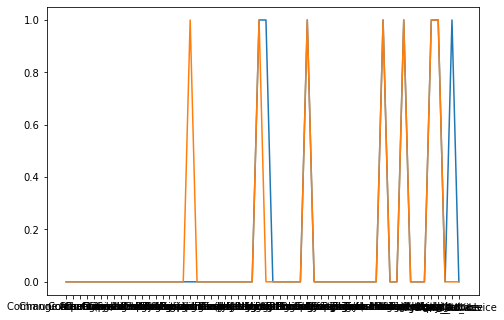

In [183]:
import matplotlib.pyplot as plt

def compare_people(mentor, mentee, compare="all", count_sims="no"):  
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    if compare == "want" or compare == "give":
        langs = list(df_want_mentee_final.columns)
        data_mentee = list(df_want_mentee_final.loc[mentee, : ])
        data_mentor = list(df_give_mentor_final.loc[mentor, : ])
    elif compare == "strengths":
        langs = list(df_strengths_mentee_final.columns)
        data_mentee = list(df_strengths_mentee_final.loc[mentee, : ])
        data_mentor = list(df_strengths_mentor_final.loc[mentor, : ])
    elif compare == "interests":
        langs = list(df_interests_mentee_final.columns)
        data_mentee = list(df_interests_mentee_final.loc[mentee, : ])
        data_mentor = list(df_interests_mentor_final.loc[mentor, : ])   
    else:
        langs = list(df_onehot_mentee.columns)
        data_mentee = list(df_onehot_mentee.loc[mentee, : ])
        data_mentor = list(df_onehot_mentor.loc[mentor, : ])
    if count_sims != "no":
        count = sum(1 for i, j in zip(data_mentee, data_mentor) if i == j)
        print(str(count) + "/" + str(len(data_mentee)))
    plt.plot(langs, data_mentee)
    plt.plot(langs, data_mentor)
    

compare_people("Octavian Preda", "Florian Herkert", count_sims="yes")
#ax.bar(langs, data)
plt.show()

41/58


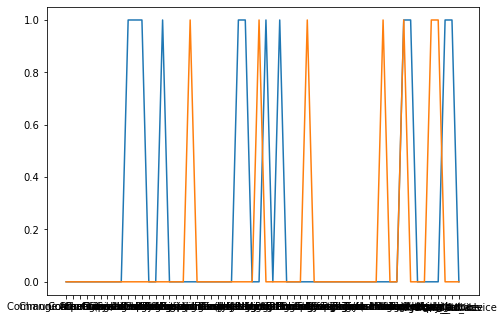

In [184]:
compare_people("Octavian Preda", "Ana Tojeiro", count_sims="yes")

In [185]:
x = list(df_strengths_mentee_final.columns)
x.sort()
x

['Change management',
 'Coaching',
 'Communications (public speaking)',
 'Competitive strategy',
 'Creativity / innovation',
 'Critical thinking',
 'Cross-architecture',
 'Crucial conversations',
 'Customer interaction',
 'Decision making',
 'Delegating',
 'Design thinking',
 'Effective listening',
 'Empowerment',
 'Finance',
 'Goal setting',
 'Influencing',
 'Negotiating',
 'Personal Brand',
 'Prioritization',
 'Productivity',
 'Providing feedback',
 'Recognition',
 'Story telling',
 'Technical knowledge',
 'Time management',
 'Transition career path',
 'Work / Life balance']

In [186]:
x = list(df_strengths_mentor_final.columns)
x.sort()
x

['Change management',
 'Coaching',
 'Communications (public speaking)',
 'Competitive strategy',
 'Creativity / innovation',
 'Critical thinking',
 'Cross-architecture',
 'Crucial conversations',
 'Customer interaction',
 'Decision making',
 'Delegating',
 'Design thinking',
 'Effective listening',
 'Empowerment',
 'Finance',
 'Goal setting',
 'Influencing',
 'Negotiating',
 'Personal Brand',
 'Prioritization',
 'Productivity',
 'Providing feedback',
 'Recognition',
 'Story telling',
 'Technical knowledge',
 'Time management',
 'Transition career path',
 'Work / Life balance']

In [187]:
df_onehot_mentee

,Art,Change management,Chess,Coaching,Communications (public speaking),Competitive strategy,Cooking,Creativity / innovation,Critical thinking,Cross-architecture,...,Transition career path,Travel,Volunteering,Wine tasting,Work / Life balance,Working out,day2day_advice,general_advice,own_advice,specific_advice
Name,,,,,,,,,,,,,,,,,,,,,
Ana Tojeiro,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,1,0
Yosephine Gita Asaria Hutauruk,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
Nikolaos Papadopoulos,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
Lucia Caiata,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
Radhika Paliwal,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,1
Gabriele Antonio Innocenti,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
Basel Iskandarani,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,1,1
Eva Roussou,0,0,0,0,1,1,1,1,0,1,...,1,1,0,0,1,1,1,1,1,0
Gurmeet Johal,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,1,0,1,1,1,1


In [188]:
for i in strengths_mentor:
    if i != strengths_mentee:
        print(i)

Story telling
Effective listening
Creativity / innovation
Competitive strategy
Accountability
Time management
Recognition
Design thinking
Personal Brand
Finance
Change management
Providing feedback
Transition career path
Delegating
Team building
Cross-architecture
Rapport Building
Coaching
Empowerment
Critical thinking
Influencing
Decision making
Productivity
Negotiating
Goal setting
Customer interaction
Prioritization
Work / Life balance
Communications (public speaking)
Crucial conversations
Social Media
Collaboration
Technical knowledge


In [189]:
list(df_onehot_mentor.isin([3]).any())

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [190]:
set(df_mentee["What are you most likely to want out of this mentoring engagement?"])

{'Form a strategic plan on how to become the best (or the mindset that will help me do);',
 'General strategic career advice;',
 'General strategic career advice;Specific career advice to prepare for next role;',
 'General strategic career advice;Specific career advice to prepare for next role;Tactical day to day situations & problem solving;',
 'General strategic career advice;Tactical day to day situations & problem solving;',
 'General strategic career advice;Tactical day to day situations & problem solving;Specific career advice to prepare for next role;',
 'Looking to hear about how they handle pressure, situational experiences (wins and losses) Want to hear their perspective on how to be a good team player Want to hear their thoughts on market changes and where tech, energy and agriculture are headed. ;General strategic career advice;',
 'Specific career advice to prepare for next role;',
 'Tactical day to day situations & problem solving;',
 'Tactical day to day situations & pro

In [191]:
############ test for keywords


#set(df["What are your personal interests?"])
test = []
for i in df["What are your early expectations from this mentoring engagement?"]:
    test.append(i)
test

NameError: name 'df' is not defined

In [ ]:
# function that combines multiple one hot encoded columns into a single column and renames it
def combine_cols(df, combine_name, combine_cols, replace="no"):
    df_output = df
    if replace == "no":
        df_output[combine_name] = 0  
    for col in combine_cols:
        df_output[combine_name] + df[col]
        #df.drop(col, axis=1, inplace=True)
    count = 0
    for number in df_output[combine_name]:
        if number > 1:
            print("yep")
            df_output.loc[df_output.index[count], combine_name] = 1
            number = 1
            count += 1
    return df_output

In [ ]:
# keyword extraction

from rake_nltk import Rake

r = Rake(max_length=1) # Uses stopwords for english from NLTK, and all puntuation characters.

r.extract_keywords_from_text(test[4])

r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.